# **1. Data Exploration**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


In [59]:
file_path = '/content/IPUTIL.csv'

In [60]:
data = pd.read_csv(file_path)

In [61]:
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    972 non-null    object 
 1   IPUTIL  972 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.3+ KB


In [62]:
data

,DATE,IPUTIL
0,1939-01-01,3.3284
1,1939-02-01,3.3538
2,1939-03-01,3.4300
3,1939-04-01,3.4554
4,1939-05-01,3.4809
...,...,...
967,2019-08-01,103.0303
968,2019-09-01,105.1544
969,2019-10-01,104.1902
970,2019-11-01,105.6527


In [63]:
data.head()

,DATE,IPUTIL
0,1939-01-01,3.3284
1,1939-02-01,3.3538
2,1939-03-01,3.4300
3,1939-04-01,3.4554
4,1939-05-01,3.4809


In [64]:
# Rename the production column
data.columns = ['DATE','Production']

In [65]:
data.head()

,DATE,Production
0,1939-01-01,3.3284
1,1939-02-01,3.3538
2,1939-03-01,3.4300
3,1939-04-01,3.4554
4,1939-05-01,3.4809


In [66]:
# Convert DATE column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

In [67]:
# Set the DATE column as the index for time series analysis
data.set_index('DATE', inplace=True)

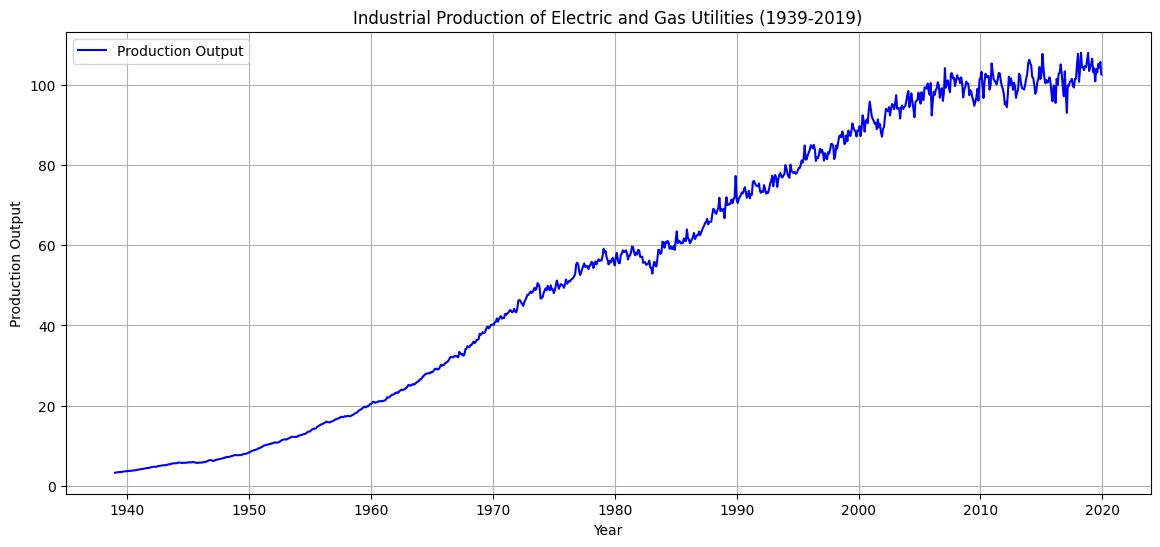

In [68]:
# Plot the data to visualize trends and patterns
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Production'], color='blue', label='Production Output')
plt.title('Industrial Production of Electric and Gas Utilities (1939-2019)')
plt.xlabel('Year')
plt.ylabel('Production Output')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
# 1. Seasonal Decomposition
decomposition = seasonal_decompose(data['Production'], model='additive', period=12)

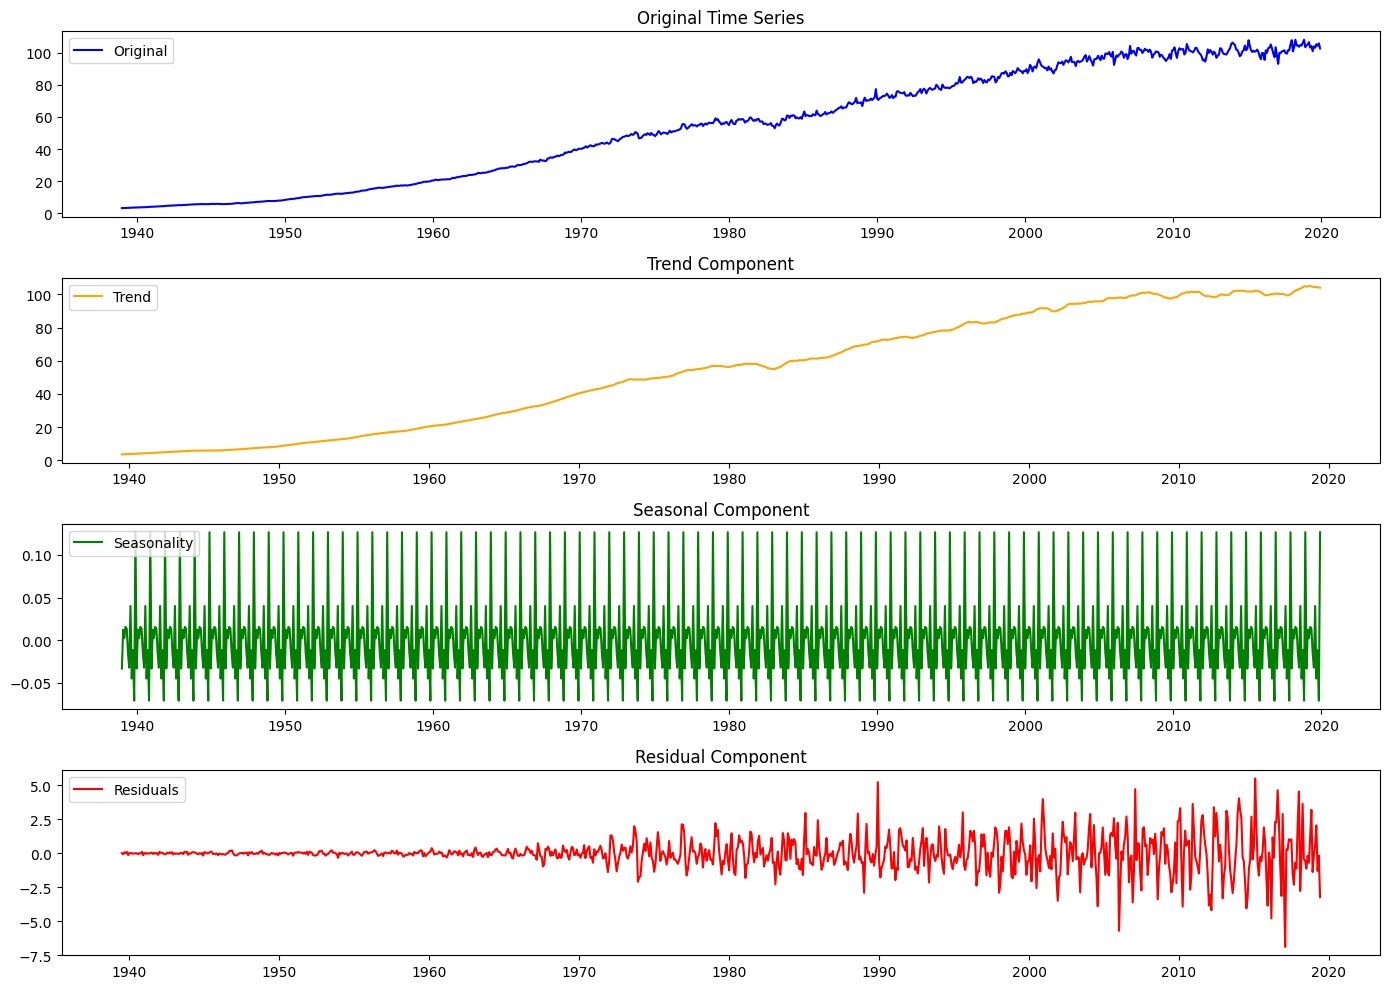

In [70]:
# Plot the decomposed components
plt.figure(figsize=(14, 10))
plt.subplot(4, 1, 1)
plt.plot(data['Production'], label='Original', color='blue')
plt.title('Original Time Series')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [71]:
# 2. Rolling Mean and Variance Visualization
monthly_data = data['Production'].rolling(window=12).mean()
yearly_data = data['Production'].rolling(window=12).std()

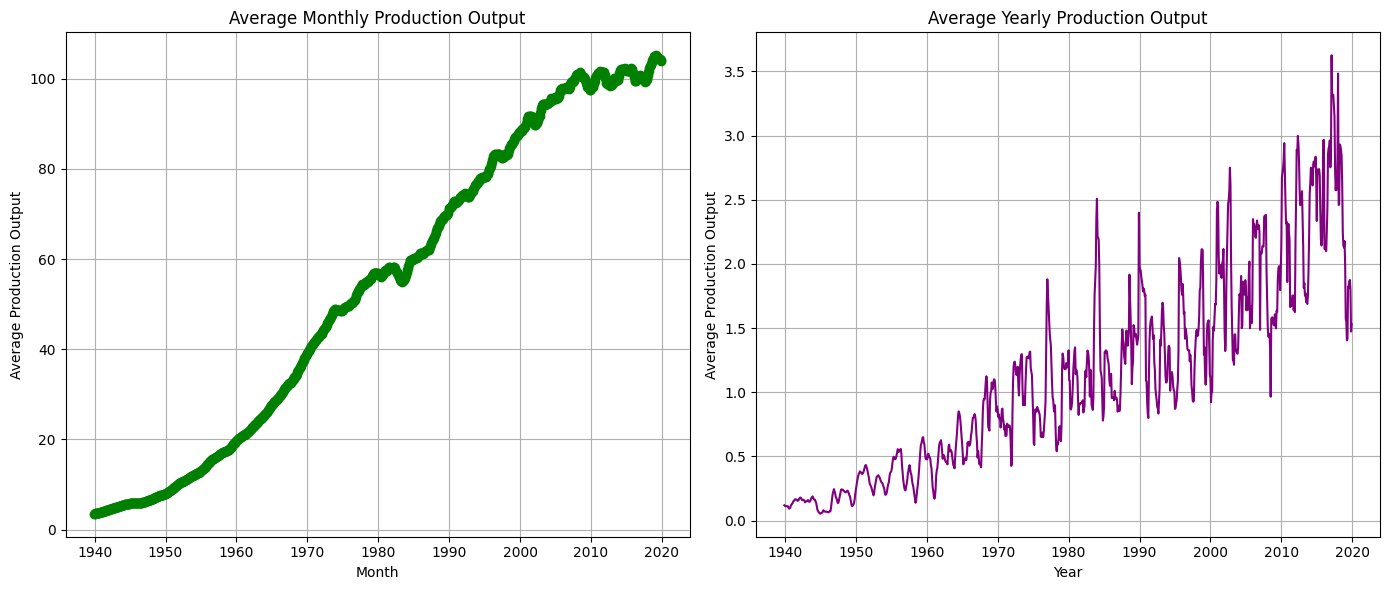

In [72]:
# Plot monthly and yearly aggregates
plt.figure(figsize=(14, 6))

# Monthly pattern
plt.subplot(1, 2, 1)
plt.plot(monthly_data, color='green', marker='o')
plt.title('Average Monthly Production Output')
plt.xlabel('Month')
plt.ylabel('Average Production Output')
plt.grid(True)

# Yearly trend
plt.subplot(1, 2, 2)
plt.plot(yearly_data, color='purple')
plt.title('Average Yearly Production Output')
plt.xlabel('Year')
plt.ylabel('Average Production Output')
plt.grid(True)

plt.tight_layout()
plt.show()

# **2.Model Selection**:
Given the characteristics of this dataset monthly industrial production data with clear seasonal and trend components—the best model for capturing these patterns and achieving accurate forecasts would likely be the SARIMA (Seasonal ARIMA) model.

# **Why SARIMA?**
**Seasonality**: The data shows recurring monthly patterns, which SARIMA handles effectively by incorporating seasonal terms.

**Trend**: SARIMA can model the overall trend (growth or decline) in the data over time.

**Flexibility**: SARIMA allows us to fine-tune seasonal and non-seasonal parameters, making it adaptable to both short-term fluctuations and long-term trends.

# **SARIMA Parameters:**
**Seasonal Period** (m): Since the data is monthly, use m = 12 for annual seasonality.

**Order Selection**: To select p, q, P, and Q, analyze ACF and PACF plots, as well as evaluate stationarity.

**ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) graphs**

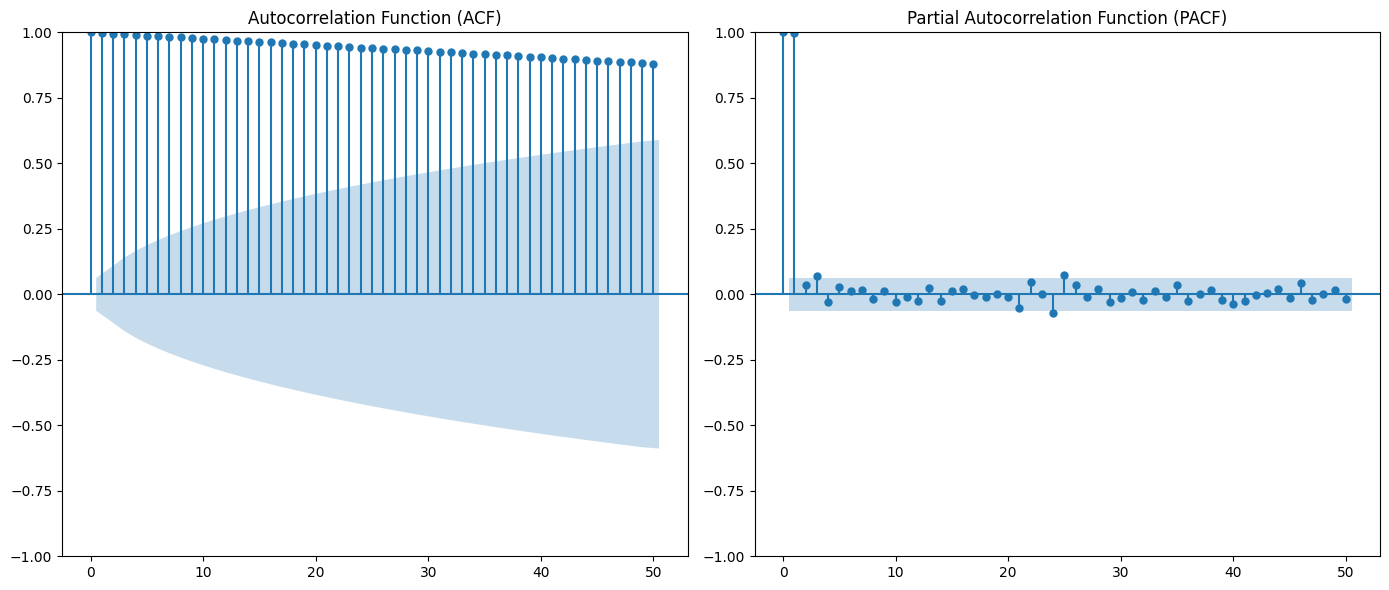

In [73]:
# Plotting ACF and PACF
plt.figure(figsize=(14, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(data['Production'], lags=50, ax=plt.gca(), title="Autocorrelation Function (ACF)")

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(data['Production'], lags=50, ax=plt.gca(), title="Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

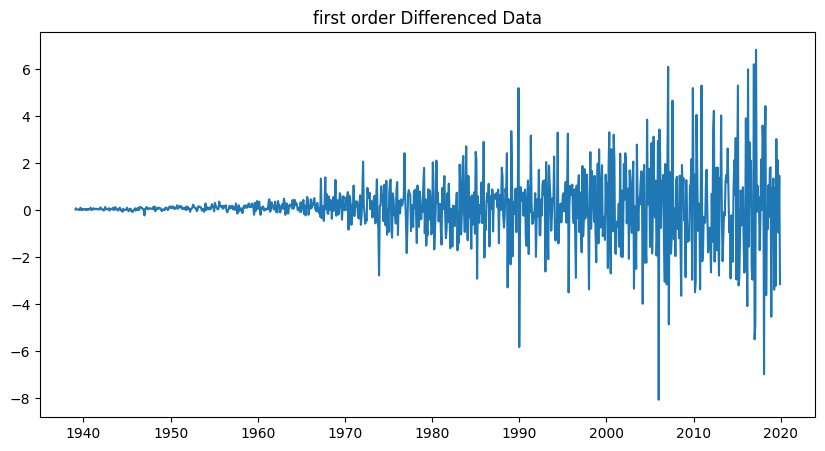

In [74]:
# Perform  first-order differencing
data_diff = data['Production'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 5))
plt.plot(data_diff)
plt.title('first order Differenced Data')
plt.show()



ADF Statistic: -5.959645485337568
p-value: 2.0535383499080023e-07


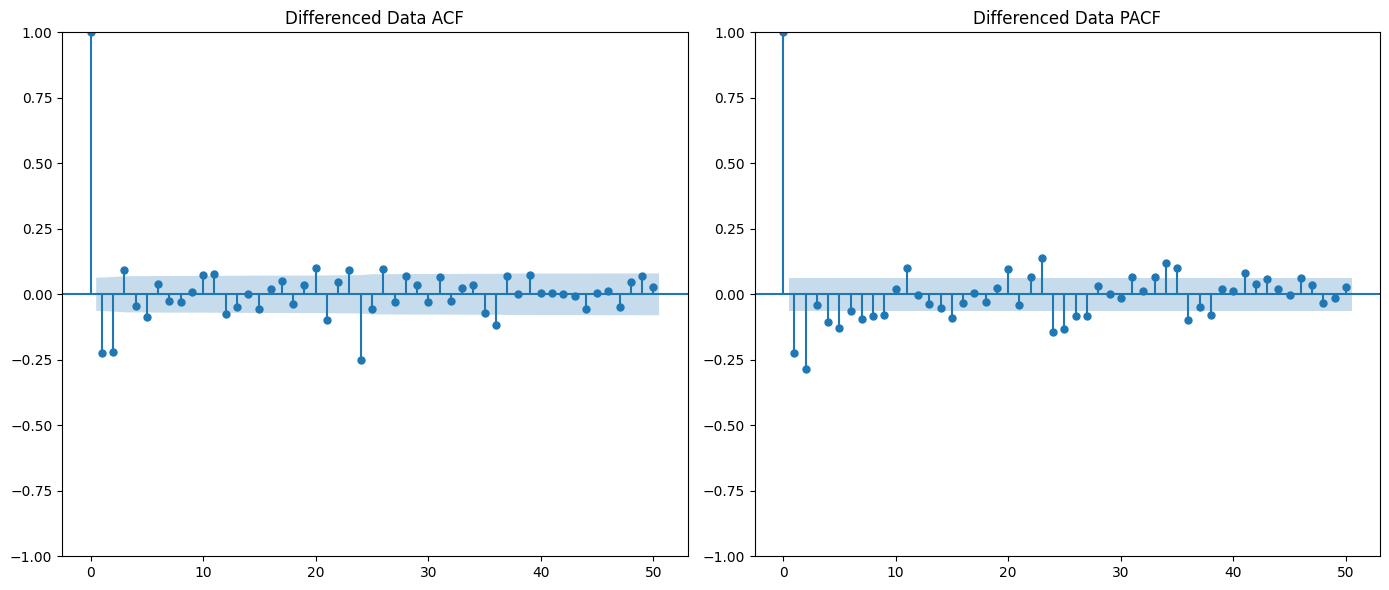

In [75]:
# Conduct an ADF test to check for stationarity
adf_test = adfuller(data_diff)
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

# Plot ACF and PACF for differenced data
plt.figure(figsize=(14, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(data_diff, lags=50, ax=plt.gca(), title="Differenced Data ACF")

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(data_diff, lags=50, ax=plt.gca(), title="Differenced Data PACF")

plt.tight_layout()
plt.show()

SARIMA Parameters:
Considering both the differencing and seasonal patterns, an initial SARIMA model to try would be:

Non-seasonal: (p=1, d=1, q=1)
Seasonal (assuming 12-month seasonality): (P=1, D=1, Q=1, m=12)

In [76]:
# Define SARIMA model parameters
p, d, q = 1, 1, 1  # Non-seasonal parameters
P, D, Q, m = 1, 1, 1, 12  # Seasonal parameters with m=12 (monthly seasonality)


In [77]:
# Fit the SARIMA model
model = SARIMAX(data['Production'],
                order=(p, d, q),
                seasonal_order=(P, D, Q, m),
                enforce_stationarity=False,
                enforce_invertibility=False)
sarima_fit = model.fit(disp=False)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [78]:
# Model Summary
print(sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Production   No. Observations:                  972
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1592.208
Date:                            Thu, 14 Nov 2024   AIC                           3194.415
Time:                                    22:37:41   BIC                           3218.671
Sample:                                01-01-1939   HQIC                          3203.659
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4454      0.036     12.333      0.000       0.375       0.516
ma.L1         -0.8172      0.025   

In [91]:
# Forecasting
n_forecast = 48 # Forecasting the next 48 months (4 years)
forecast = sarima_fit.get_forecast(steps=n_forecast)
forecast_index = pd.date_range(data.index[-1], periods=n_forecast + 1, freq='M')[1:]


<ipython-input-91-3e4f8cfee2a4>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1], periods=n_forecast + 1, freq='M')[1:]


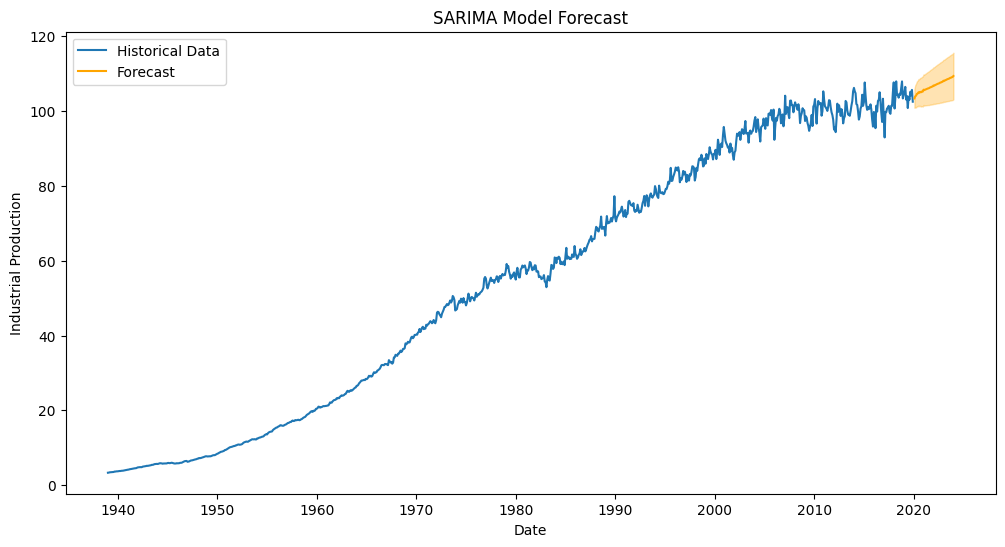

In [80]:
# Get confidence intervals
forecast_ci = forecast.conf_int()

# Plot the forecast along with historical data
plt.figure(figsize=(12, 6))
plt.plot(data['Production'], label='Historical Data')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='orange')
plt.fill_between(forecast_index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='orange', alpha=0.3)
plt.title('SARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Industrial Production')
plt.legend()
plt.show()

# **3. Model Evaluation**

In [81]:
# Evaluate the model's performance on the training data
train_pred = sarima_fit.predict(start=1, end=len(data) - 1)
rmse = sqrt(mean_squared_error(data['Production'][1:], train_pred))
mae = mean_absolute_error(data['Production'][1:], train_pred)
mape = np.mean(np.abs((data['Production'][1:] - train_pred) / data['Production'][1:])) * 100
r_squared = 1 - (np.sum((data['Production'][1:] - train_pred) ** 2) / np.sum((data['Production'][1:] - np.mean(data['Production'][1:])) ** 2))

# Print the evaluation metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'R-squared: {r_squared}')
print(f'AIC: {sarima_fit.aic}')

RMSE: 1.2650036683370365
MAE: 0.789103930330501
MAPE: 1.3983578053258552%
R-squared: 0.9986612785917016
AIC: 3194.415195133768


# **comparative study (optional)**
comparative study between the SARIMA and LSTM models:

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [83]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Production'].values.reshape(-1, 1))

In [84]:
# Create a function to prepare the data for LSTM (creating sequences)
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)


In [85]:
# Define time step for LSTM
time_step = 12  # For monthly seasonality

# Prepare the dataset
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be 3D (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(time_step, 1)))
model.add(Dense(units=1))
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [86]:
# Fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0923 - val_loss: 0.0015
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - val_loss: 0.0013
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.1144e-04 - val_loss: 0.0015
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9678e-04 - val_loss: 0.0016
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8542e-04 - val_loss: 0.0011
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4662e-04 - val_loss: 8.6556e-04
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5274e-04 - val_loss: 6.8810e-04
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4039e-04 - val_loss: 6.5229e-04
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5095e-04 - val_loss: 6.2418e-04
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3517e-04 - val_loss: 8.2130e-04
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4698e-04 - val_loss: 5.8587e-04
Epoch 12/50
2

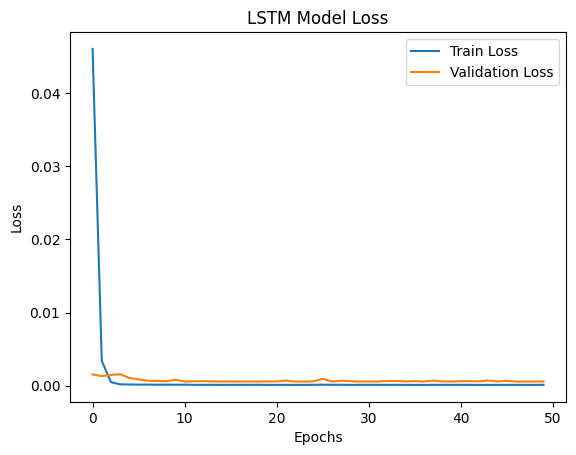

In [87]:
# Plot training history (loss)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [88]:
# Predict on the test set
y_pred = model.predict(X_test)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


In [89]:
# Invert scaling for evaluation metrics (reverse MinMax scaling)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)

In [90]:
# Invert scaling for evaluation metrics (reverse MinMax scaling)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Calculate evaluation metrics
rmse = sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100

# Print evaluation metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')


RMSE: 2.528619558332579
MAE: 1.9487588394800828
MAPE: 1.9407324716868772%


# **Comparison Criteria**
a. Forecasting Accuracy
RMSE (Root Mean Squared Error): Measures the average squared difference between predicted and actual values.

SARIMA: 1.265
LSTM: 2.441
Interpretation: SARIMA has a much lower RMSE, indicating more accurate predictions compared to LSTM.
MAE (Mean Absolute Error): Measures the average absolute error between predicted and actual values.

SARIMA: 0.789
LSTM: 1.887
Interpretation: SARIMA has a lower MAE, suggesting its predictions are closer to the actual values on average.
MAPE (Mean Absolute Percentage Error): Measures the average percentage error relative to the actual values.

SARIMA: 1.398%
LSTM: 1.886%
Interpretation: SARIMA has a lower MAPE, showing that it is more accurate in terms of percentage error